In [2]:
import pandas as pd
import numpy as np
import plotly as plt
import seaborn as sns
import sklearn as skl

In [3]:
df = pd.read_csv('/content/frete_dias_entrega.csv', delimiter=";")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             500 non-null    object 
 1   Valor do Frete     500 non-null    float64
 2   Dias para Entrega  500 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


In [5]:
sd_df =  df[df['Região'] == 'Sudeste']

In [6]:
sd_df.head()

,Região,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0


In [7]:
sd_df.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


<Axes: >

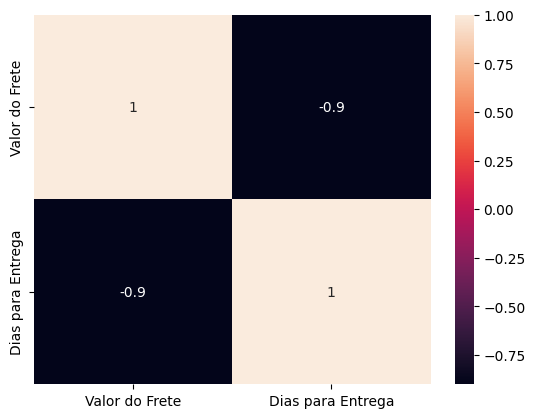

In [14]:
sns.heatmap(sd_df[['Valor do Frete', 'Dias para Entrega']].corr(), annot =True)

<Axes: >

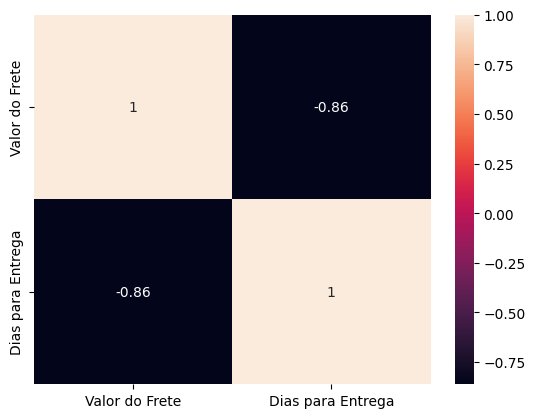

In [15]:
sns.heatmap(df[['Valor do Frete', 'Dias para Entrega']].corr(), annot =True)

In [16]:
df.head()

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
modelOfRegression = LinearRegression()

In [19]:
type(modelOfRegression)

sklearn.linear_model._base.LinearRegression

In [21]:
Frete = sd_df.iloc[:,1].values

In [22]:
print(Frete)

[106.04 103.51  82.69 108.23 116.11 116.26  92.89 116.46 111.23  48.95
  41.5   78.98 102.68  63.54  92.67  49.36  59.45  89.51  91.84  70.88
 115.21  60.42 119.57  66.   118.7   37.7   88.29  56.9   87.75 101.31
  82.85  65.84  96.94  68.87  33.47  60.72 100.98 106.64 109.98  84.89
  76.32 100.53 117.47  86.73 115.8   69.96  98.35  84.64 118.49  94.12
  89.33  82.59 100.33 117.05  85.69  59.6  108.99  95.84 118.57  50.12
  80.26  74.58  57.69  60.26 115.93  88.84  92.82  89.15  96.69 114.66
 114.56  60.02  91.63 119.06  98.77  88.12  59.78  95.71  74.45  95.53
  87.85 109.58  19.17 107.31 107.27  93.99  83.67  73.73  84.72  75.63
  78.52  77.17  51.31  46.94 102.65  84.04 108.2   96.42 115.34  70.3 ]


In [23]:
Frete = Frete.reshape(-1,1)
Frete.shape

(100, 1)

In [24]:
Prazo = sd_df.iloc[:,2].values
Prazo = Prazo.reshape(-1,1)
Prazo.shape


(100, 1)

In [25]:
modelOfRegression.fit(Frete, Prazo)

LinearRegression()

In [26]:
modelOfRegression.intercept_

array([27.94772255])

In [27]:
modelOfRegression.coef_

array([[-0.22741735]])

In [28]:
previsao_prazo = modelOfRegression.predict(Frete)


In [29]:
import plotly.express as px

In [30]:
px.scatter(x = Frete.ravel(), y = Prazo.ravel(), trendline="ols")

In [31]:
(modelOfRegression.coef_*52.98 + modelOfRegression.intercept_).round()

array([[16.]])

In [32]:
(modelOfRegression.coef_*118 + modelOfRegression.intercept_).round()

array([[1.]])

In [33]:
 modelOfRegression.predict([[37.7]])

array([[19.37408855]])

In [34]:
modelOfRegression.score(Frete, Prazo)

0.8111671052762233

In [36]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Prazo, previsao_prazo)

2.091861170350245